# COMP30850 - Network Analysis
## Assignment 1
### Shane cooke - 17400206

In order to complete this assignment, I have written code which parses the JSON datasets, creates co-starring networks, identifies and removes any isolated nodes, characterises the structure and connectivity of each network, identifies important nodes in each network and creates ego-networks from important nodes within the original networks. Comments are provided to describe what each line of code does, and mark-down cells are used to describe what each block of code does, and what result we get from running that block.  The specific question being answered by each block of code can be found in the first line of the output after that block has been run and also in the markdown cells.

In [1]:
import pandas as pd
import json
import networkx as nx
from pylab import rcParams
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

class color: #A class for altering text output with different values for each colour/format.
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

print(color.RED+color.BOLD+color.UNDERLINE+ 'Question 1(a)/(b)\n' + color.END) #Prints the question being answered.
    
filename1 = '17400206-dataset1.json' #Variable containing the name of file 1.

with open(filename1) as f: #Opens the first input file.
    data = json.load(f) #Saves the data into a variable called data.

eof = len(data) #Variable containing the length of the first file.
names = [None] * eof #List of names.
films = [None] * eof #List of films.
    
for i in range(0, eof): #For loop to populate the names list with the names from the first input file.
    names[i] = data[i]['name']
    
for i in range(0, eof): #For loop to poplate the films list with the films from the first input file.
        films[i] = data[i]['movies']
        
list_of_titles = [] #Variable to contain isolated list of titles.
for x in range(0, eof): #Nested for loop which iterates through the films list and isolates all of titles and
    temp_list = []      #removes all uneccesary information such as 'id', 'year' and 'kind'.
    for film in films[x]:
        temp_list.append(film["title"])
    list_of_titles.append(temp_list)
       
name_and_titles = {} #Variable to contain dictionary of names and titles.
for key in names: #Nested for loop which will assign names as keys and titles as values in our dictionary.
    for value in list_of_titles: 
        name_and_titles[key] = value 
        list_of_titles.remove(value) 
        break
    
print(name_and_titles) #Prints the fully edited names and titles dictionary.

Question 1(a)/(b)

{'Ernest Borgnine': ['The Man Who Shook the Hand of Vicente Fernandez', 'Snatched', 'SpongeBob SquarePants: Heroes of Bikini Bottom', 'The Lion of Judah', 'Night Club', 'Another Harvest Moon', 'RED', 'The Genesis Code', 'Enemy Mind', "The Prologue to Houdini Magic's Expert at the Card Table", 'Frozen Stupid', "Chinaman's Chance: America's Other Slaves", 'Strange Wilderness', 'Oliviero Rising', 'La cura del gorilla', 'Spongebob Squarepants: Tide and Seek', 'That One Summer', 'Rail Kings', '3 Below', 'Barn Red', 'Renegade', 'The Long Ride Home', 'Whiplash', 'September 11', 'Castle Rock', 'The Kiss of Debt', 'Hoover', 'The Last Great Ride', 'The Lost Treasure of Sawtooth Island', 'Shadows of the Past', 'An All Dogs Christmas Carol', 'Mel', '12 Bucks', 'BASEketball', 'Small Soldiers', 'Gattaca', "McHale's Navy", "Merlin's Shop of Mystical Wonders", 'All Dogs Go to Heaven 2', 'Captiva Island', 'Outlaws: The Legend of O.B. Taggart', 'Spirit of the Season', 'Mistress', 'The

**Code Description**\
The above block of code begins by reading the first input file `17400206-dataset1.json` into the variable `data`. The names from the input file are then read into a new list called `names` and the movies from the original file are read into a list called `films`. A for loop is then used to remove all of the unnecessary pieces of information from the `films` list, leaving us with only the titles of the films. The result of this for loop is saved into the variable `list_of_titles`. I then created a dictionary called `name_and_titles` which contains the name of the actor and the corresponding film titles that they have been in. This cleaned version of the input data will be used to create the co-starring network.

In [2]:
print(color.RED+color.BOLD+color.UNDERLINE+ 'Question 1(a)/(b)\n' + color.END) #Prints the question being answered.

filename2 = '17400206-dataset2.json' #Variable containing the name of file 2.

with open(filename2) as f2: #Opens the second input file.
    data2 = json.load(f2) #Saves the data into a variable called data.

eof2 = len(data2) #Variable containing the length of the second file.
names2 = [None] * eof2 #List of names.
films2 = [None] * eof2 #List of films.
    
for i in range(0, eof2): #For loop to populate the names list with the names from the second input file.
    names2[i] = data2[i]['name']
    
for i in range(0, eof2): #For loop to poplate the films list with the films from the second input file.
        films2[i] = data2[i]['movies']
    
list_of_titles2 = [] #Variable to contain isolated list of titles.
for x in range(0, eof2): #Nested for loop which iterates through the films list and isolates all of titles and
    temp_list2 = []      #removes all uneccesary information such as 'id', 'year' and 'kind'.
    for film in films2[x]:
        temp_list2.append(film["title"])
    list_of_titles2.append(temp_list2)
       
name_and_titles2 = {} #Variable to contain dictionary of names and titles.
for key in names2: #Nested for loop which will assign names as keys and titles as values in our dictionary.
    for value in list_of_titles2: 
        name_and_titles2[key] = value 
        list_of_titles2.remove(value) 
        break
    
print(name_and_titles2) #Prints the fully edited names and titles dictionary.

Question 1(a)/(b)

{'Rebel Wilson': ['Cats', 'Jojo Rabbit', 'The Hustle', "Isn't It Romantic", 'Pitch Perfect 3', 'Absolutely Fabulous: The Movie', 'The Brothers Grimsby', 'How to Be Single', 'Pitch Perfect 2', 'Night at the Museum: Secret of the Tomb', 'Pain & Gain', 'Pitch Perfect', 'Ice Age: Continental Drift', "What to Expect When You're Expecting", 'Struck by Lightning', 'Small Apartments', 'Bachelorette', 'A Few Best Men', 'Bridesmaids', 'Bargain', 'The Netball Diaries', 'Ghost Rider', 'Fat Pizza'], 'Maggie Gyllenhaal': ['Best Summer Ever', 'The Kindergarten Teacher', 'Home', 'The New Empress', 'Beauty Mark', 'The Honourable Woman', 'River of Fundament', 'Frank', 'White House Down', "Won't Back Down", 'Hysteria', 'Nanny McPhee Returns', 'Crazy Heart', 'Away We Go', 'The Dark Knight', 'High Falls', 'Stranger Than Fiction', 'World Trade Center', 'Monster House', "Paris, je t'aime", 'Sherrybaby', 'Trust the Man', 'The Great New Wonderful', 'Happy Endings', 'Criminal', 'The Pornograp

**(Same steps as previous cell)**\
\
**Code Description**\
The above block of code begins by reading the first input file `17400206-dataset2.json` into the variable `data2`. The names from the input file are then read into a new list called `names2` and the movies from the original file are read into a list called `films2`. A for loop is then used to remove all of the unnecessary pieces of information from the `films2` list, leaving us with only the titles of the films. The result of this for loop is saved into the variable `list_of_titles2`. I then created a dictionary called `name_and_titles2` which contains the name of the actor and the corresponding film titles that they have been in. This cleaned version of the input data will be used to create the co-starring network.

Question 1(a)/(b)

Network graph for Dataset 1:



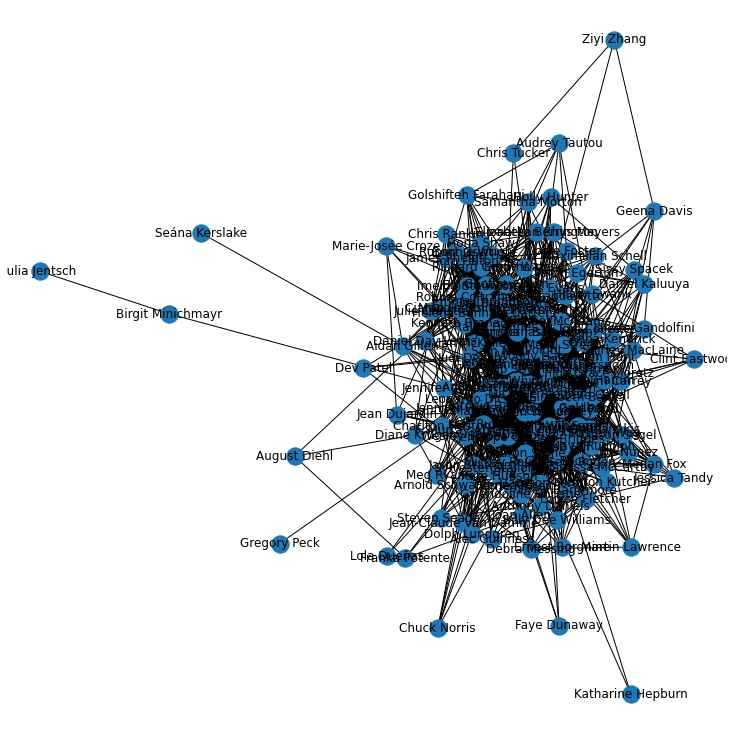

In [3]:
print(color.RED+color.BOLD+color.UNDERLINE+ 'Question 1(a)/(b)\n' + color.END) #Prints the question being answered.

print(color.BOLD + 'Network graph for Dataset 1:\n' + color.END) #Prints a title for the network.
g = nx.Graph() #Creates a networkx undirected graph called 'g'.

for y in range(0,len(names)): #Nested for loop to add nodes and edges to our networkx graph from our input file.
    for x in range(0,len(names)):
        if(x!=y): #Ensures an actor is not considered a co-star of themself.
            z = list(set(name_and_titles[names[x]]).intersection(name_and_titles[names[y]]))
            if z:
                g.add_edge(names[x], names[y], weight = len(z)) #Adds an edge between name x and name y with a weight
                                                                #of the length of z.
rcParams['figure.figsize'] = 10,10 #Sets size parameters for network diagram.
nx.draw(g, with_labels=True) #Draws the network diagram.

#nx.write_gexf(g, "NetworksA1A.gexf") #Writes the networkx diagram to the file 'NetworksA1A.gexf'.

#for e in g.edges(data=True): #Prints all edges and weights in the network.
    #print(e)

\
**Code Description**\
The above cell begins by initialising a networkx graph called `g`. A for loop is then used to populate this networkx graph with nodes representing actors and edges representing common titles from Dataset 1. I then set the parameters for the graph and used `nx.draw` to plot the network. The network is then saved to `NetworksA1A.gexf` for analysis in gephi, and another for loop is used to print out all of the edge and weight values. The process I used to create the network ensured that isolated nodes never got added to the network in the first place, which meant that no steps were necessary to remove any isolated nodes.

Question 1(a)/(b)

Network graph for Dataset 2:



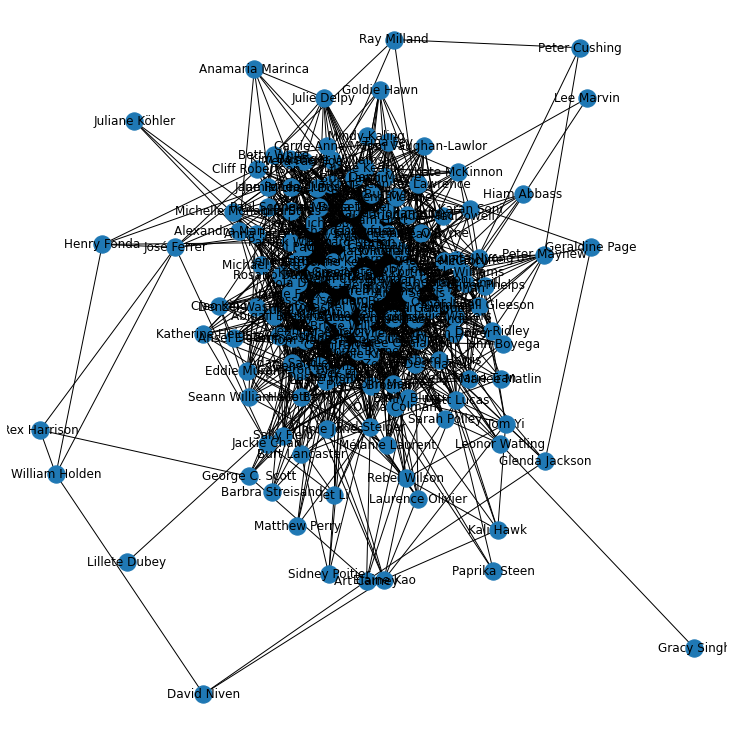

In [4]:
print(color.RED+color.BOLD+color.UNDERLINE+ 'Question 1(a)/(b)\n' + color.END) #Prints the question being answered.

print(color.BOLD + 'Network graph for Dataset 2:\n' + color.END) #Prints a title for the network.
g2 = nx.Graph() #Creates a networkx undirected graph called 'g'.

for y in range(0,len(names2)): #Nested for loop to add nodes and edges to our networkx graph from our input file.
    for x in range(0,len(names2)):
        if(x!=y): #Ensures an actor is not considered a co-star of themself.
            z2 = list(set(name_and_titles2[names2[x]]).intersection(name_and_titles2[names2[y]]))
            if z2:
                g2.add_edge(names2[x], names2[y], weight = len(z2)) #Adds an edge between name x and name y with 
                                                                    #a weight of the length of z.
rcParams['figure.figsize'] = 10,10 #Sets size parameters for network diagram.
nx.draw(g2, with_labels=True) #Draws the network diagram.

#nx.write_gexf(g2, "NetworksA1B.gexf")  #Writes the networkx diagram to the file 'NetworksA1B.gexf'.

#for e in g2.edges(data=True): #Prints all edges and weights in the network.
#    print(e)

\
**(Same steps as previous cell)**\
\
**Code Description**\
The above cell begins by initialising a networkx graph called `g2`. A for loop is then used to populate this networkx graph with nodes representing actors and edges representing common titles from Dataset 2. I then set the parameters for the graph and used `nx.draw` to plot the network. The network is then saved to `NetworksA1B.gexf` for analysis in gephi, and another for loop is used to print out all of the edge and weight values. The process I used to create the network ensured that isolated nodes never got added to the network in the first place, which meant that no steps were necessary to remove any isolated nodes.

Question 2(a)

Characteristics of Network 1: 

Is this network directed: False
Is this network connected: True
This network has 145 nodes and 1491 edges
The density of this network is: 0.143
The diameter of this network is: 5


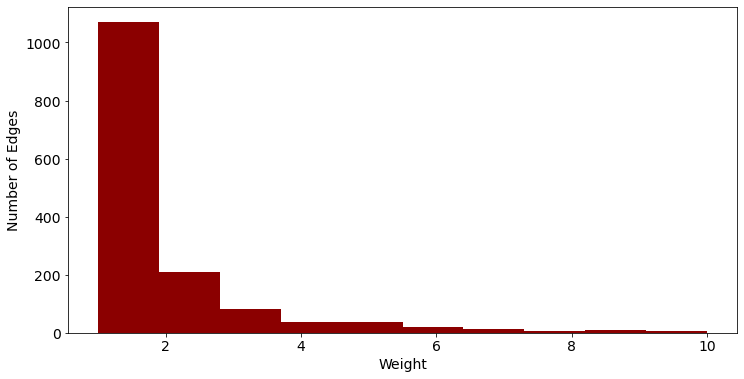

In [5]:
print(color.RED+color.BOLD+color.UNDERLINE+ 'Question 2(a)\n' + color.END) #Prints the question being answered.

print(color.BOLD + 'Characteristics of Network 1: \n' + color.END)
print("Is this network directed: %s" % (nx.is_directed(g))) #Query to check if the network is directed.
print("Is this network connected: %s" % (nx.is_connected(g))) #Query to check if the network is connected.
print("This network has %d nodes and %d edges" % (g.number_of_nodes(), g.number_of_edges())) #Query to check the amount of nodes and edges in the network.
print("The density of this network is: %.3f" % (nx.density(g))) #Query to check the density of the network.
print("The diameter of this network is: %d" % (nx.diameter(g))) #Query to check the diameter of the network.

weights = {} #Creates an empty dictionary called 'weights'.
for node1, node2, data in g.edges(data=True): #For loop to iterate through all nodes and edges of 'g'.
    weights[(node1,node2)] = data["weight"] #Populates the dictionary 'weights' with the weights and corresponding nodes.
    
s_weights = pd.Series(weights) #Creates a pandas series of weights.

ax = s_weights.plot.hist(figsize=(12,6), fontsize=14, legend=None, color="darkred") #Plots a histogram using 'Number of Edges' and 'Weights'.
ax.set_ylabel("Number of Edges", fontsize=14) #Sets x-axis.
ax.set_xlabel("Weight", fontsize=14); #Sets y-axis.

**Code Description**\
In this cell, I use a variety of different queries to characterise the structure and connectivity of the network. I first check whether the network is directed and whether it is connected. I then find the number of nodes and edges, the density of the network and the diameter of the network. Finally, I plot a histogram displaying the number of edges that have each weight value.\
\
**Analysis**\
The network gained from Dataset 1 is an undirected network, which is fully connected. It has 145 nodes and 1491 edges, has a density of 0.143 and has a diameter of 5. As you can see from the graph, the most common edge weight is 1, with 1000+ edges having this weight. The number of edges per weight decreases as the weight increases. The least common edge weight is 10.

Question 2(a)

Characteristics of Network 2: 

Is this network directed: False
Is this network connected: True
This network has 162 nodes and 1660 edges
The density of this network is: 0.127
The diameter of this network is: 5


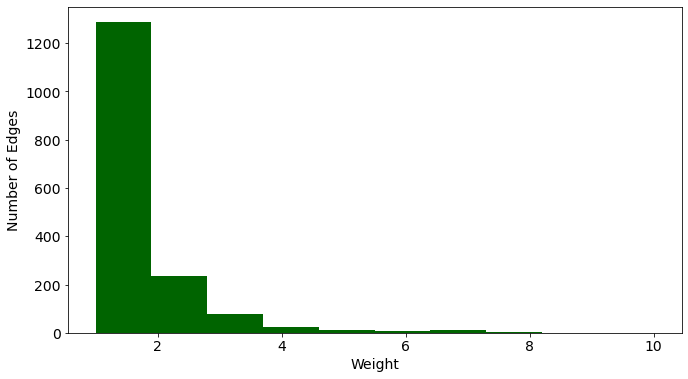

In [6]:
print(color.RED+color.BOLD+color.UNDERLINE+ 'Question 2(a)\n' + color.END) #Prints the question being answered.

print(color.BOLD + 'Characteristics of Network 2: \n' + color.END)
print("Is this network directed: %s" % (nx.is_directed(g2))) #Query to check if the network is directed.
print("Is this network connected: %s" % (nx.is_connected(g2))) #Query to check if the network is connected.
print("This network has %d nodes and %d edges" % (g2.number_of_nodes(), g2.number_of_edges())) #Query to check the amount of nodes and edges in the network.
print("The density of this network is: %.3f" % (nx.density(g2))) #Query to check the density of the network.
print("The diameter of this network is: %d" % (nx.diameter(g2))) #Query to check the diameter of the network.

weights2 = {} #Creates an empty dictionary called 'weights2'.
for node1, node2, data in g2.edges(data=True): #For loop to iterate through all nodes and edges of 'g2'.
    weights2[(node1,node2)] = data["weight"] #Populates the dictionary 'weights' with the weights and corresponding nodes.
    
s_weights2 = pd.Series(weights2) #Creates a pandas series of weights.

ax = s_weights2.plot.hist(figsize=(11,6), fontsize=14, legend=None, color="darkgreen") #Plots a histogram using 'Number of Edges' and 'Weights'.
ax.set_ylabel("Number of Edges", fontsize=14) #Sets x-axis.
ax.set_xlabel("Weight", fontsize=14); #Sets y-axis.

\
**(Same steps as previous cell)**\
\
**Code Description**\
In this cell, I use a variety of different queries to characterise the structure and connectivity of the network. I first check whether the network is directed and whether it is connected. I then find the number of nodes and edges, the density of the network and the diameter of the network. Finally, I plot a histogram displaying the number of edges that have each weight value.\
\
**Analysis**\
The network gained from Dataset 2 is an undirected network, which is fully connected. It has 162 nodes and 1660 edges, has a density of 0.127 and has a diameter of 5. As you can see from the graph, the most common edge weight is 1, with 1200+ edges having this weight. The number of edges per weight decreases as the weight increases. The least common edge weight is 8.

**Comparison between networks:**\
Both networks are undirected and both are fully connected. Network 2 has 17 more nodes and 169 more edges than Network 1. Network 1 is more dense than Network 2, and both networks have a diameter of 5. The vast majority of edges in both networks have a weight of 1, however network 2 has a much larger amount of nodes with this weight. In network 1, the highest edge-weight is 10, however in network 2 the highest edge-weight is only 8.\
Through the above metrics, we see that network 1 and network 2 are very simliar networks with a few minor differences in the amount of nodes and edges, and the densities of the graphs. Both networks have the same density (5), and both networks are fully connected and undirected.

Question 2(b)


Degree characteristics of Network 1: 

The Degree range of this network is: [1, 51]
The Mean degree of this network is: 20.57
The Median degree of this network is: 21


Ten Highest degrees of network 1: 

Ralph Fiennes           51
Meryl Streep            48
Robert De Niro          47
Julianne Moore          47
Jim Broadbent           44
Penélope Cruz           41
Whoopi Goldberg         40
Helena Bonham Carter    39
Judi Dench              39
Matt Damon              38
dtype: int64


Ten most important nodes according to centrality measures: 


,degree_centrality,betweenness,closeness,eigenvector,norm_eigenvector
Name,,,,,
Ralph Fiennes,0.354167,0.032790,0.600000,0.196342,1.000000
Julianne Moore,0.326389,0.021548,0.582996,0.170326,0.867499
Meryl Streep,0.333333,0.033504,0.582996,0.165834,0.844620
Robert De Niro,0.326389,0.045997,0.587755,0.165482,0.842824
Jim Broadbent,0.305556,0.021014,0.569170,0.164694,0.838815
Judi Dench,0.270833,0.018325,0.562500,0.152972,0.779110
Helena Bonham Carter,0.270833,0.012956,0.558140,0.151788,0.773083
Penélope Cruz,0.284722,0.028357,0.566929,0.146093,0.744076
Ewan McGregor,0.256944,0.014426,0.549618,0.138446,0.705129


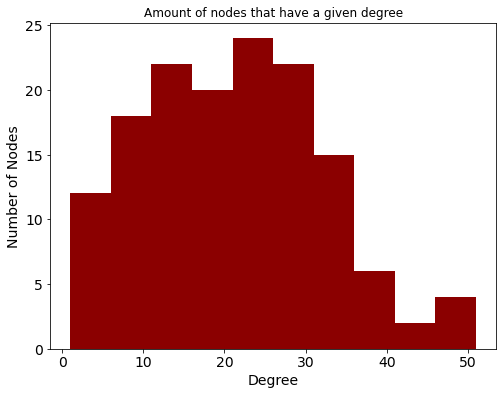

In [7]:
print(color.RED+color.BOLD+color.UNDERLINE+ 'Question 2(b)\n' + color.END) #Prints the question being answered.

degrees = dict( g.degree()) #Creates a dictionary of degrees.
degree_seq = pd.Series(degrees) #Creates a pandas series of degrees.

print(color.BOLD + '\nDegree characteristics of Network 1: \n' + color.END)
print('The Degree range of this network is: [%d, %d]' % (degree_seq.min(), degree_seq.max())) #Query to check the degree range of the network.
print('The Mean degree of this network is: %.2f' % degree_seq.mean()) #Query to check the mean degree of the network.
print('The Median degree of this network is: %d\n' % degree_seq.median()) #Query to check the median degree of the network.

print(color.BOLD + '\nTen Highest degrees of network 1: \n' + color.END)
print(degree_seq.nlargest(10)) #Prints the 10 largest degrees in the network.

ax = degree_seq.plot.hist(figsize=(8,6), fontsize=14, legend=None, color="darkred",title='Amount of nodes that have a given degree')
ax.set_ylabel("Number of Nodes", fontsize=14) #Plots a histogram using 'Number of Nodes' and 'Degree'.
ax.set_xlabel("Degree", fontsize=14);

print(color.BOLD + '\n\nTen most important nodes according to centrality measures: ' + color.END)

deg = nx.degree_centrality(g) #Variable 'deg' contains degree centralities.
s = pd.Series(deg) #Creates a pandas series of degree centralites.
df = pd.DataFrame(s,columns=["degree_centrality"]) #Creates a pandas dataframe and adds column 'degree_centrality'.
df.index.name = 'Name' #Sets the index column to 'Name'.
df.sort_values(by="degree_centrality",ascending=False).nlargest(10, "degree_centrality") #Sorts values by 10 largest 'degree_centrality'.

bet = nx.betweenness_centrality(g) #Variable 'bet' contains betweenness centralities.
df["betweenness"] = pd.Series(bet) #Creates a column in our dataframe from a betweenness pandas series.
df.sort_values(by="betweenness",ascending=False).nlargest(10, "betweenness") #Sorts values by 10 largest 'betweenness centrality'.

close = nx.closeness_centrality(g) #Variable 'close' contains betweenness closenesses.
df["closeness"] = pd.Series(close) #Creates a column in our dataframe from a closeness pandas series.
df.sort_values(by="closeness",ascending=False).nlargest(10, "closeness") #Sorts values by 10 largest 'closeness'.

eig = nx.eigenvector_centrality(g) #Variable 'eig' contains betweenness closenesses.
df["eigenvector"] = pd.Series(eig) #Creates a column in our dataframe from an eigenvector pandas series.
df.sort_values(by="eigenvector",ascending=False).nlargest(10, "eigenvector") #Sorts values by 10 largest 'eigenvector'.

df["norm_eigenvector"] = df["eigenvector"]/max(df["eigenvector"]) #Creates a normalised eigenvector column in our dataframe from eigenvector divided by max eigenvector.
df.sort_values(by="norm_eigenvector",ascending=False).nlargest(10, "norm_eigenvector") #Sorts values by 10 largest 'norm_eigenvector'.

\
**Code Description**\
In this cell, I apply a range of different methods to characterise the structure and connectivity of network 1. I begin by finding the degree range, mean degree and median degree of the network. I then make a table of the ten highest degrees in the table and display them in descending order. I then plotted a histogram showing the amount of nodes that have a given degree, for instance the amount of nodes that have a degree of 20. I then created a table showing the ten highest degree centralities, betweennesses, closenesses, eigenvectors and normalised eigenvectors.\
\
**Analysis**\
The network gained from Dataset 1 has a degree range between 1 and 51. It has a mean degree of 20.57 and a median degree of 21. Ralph Fiennes has the highest degree (51), with Meryl Streep and Robert De Niro having the second and third highest. Ralph Fiennes has the highest degree centrality, closeness, eigenvector and normalised eigenvector values. Robert De Niro has the highest betweenness value. Most nodes fall between a degree range of 20-30, with the highest degree values reaching into the 50's. Taking all centrality measures into account, Ralph Fiennes appears the be the most important node in the network, closely followed by Julianne Moore, Meryl Streep and Robert De Niro.

Question 2(b)


Degree characteristics of Network 2: 

The Degree range of this network is: [1, 54]
The Mean degree of this network is: 20.49
The Median degree of this network is: 19


Ten highest degrees of network 2: 

Bruce Willis       54
William Hurt       51
Michael Gambon     47
Natalie Portman    45
Willem Dafoe       45
Anthony Hopkins    44
Jeremy Irons       43
Glenn Close        43
Brendan Gleeson    43
Kathy Bates        42
dtype: int64


Ten most important nodes according to centrality measures: 


,degree_centrality,betweenness,closeness,eigenvector,norm_eigenvector
Name,,,,,
William Hurt,0.316770,0.039812,0.577061,0.170154,1.000000
Bruce Willis,0.335404,0.041604,0.589744,0.162593,0.955567
Michael Gambon,0.291925,0.025411,0.570922,0.159295,0.936180
Anthony Hopkins,0.273292,0.017056,0.562937,0.157359,0.924804
Edward Norton,0.260870,0.012416,0.559028,0.153603,0.902728
Natalie Portman,0.279503,0.027875,0.566901,0.149722,0.879921
Jeremy Irons,0.267081,0.018759,0.557093,0.148422,0.872281
Glenn Close,0.267081,0.016703,0.560976,0.148127,0.870550
Brendan Gleeson,0.267081,0.016495,0.557093,0.143306,0.842216


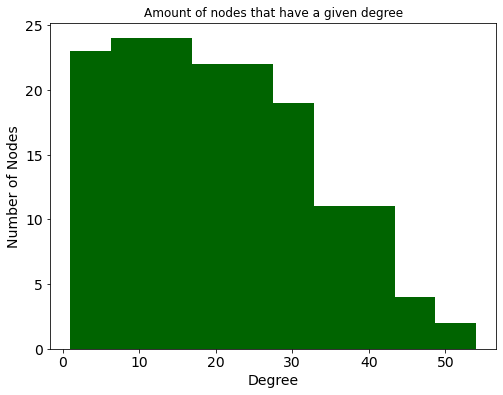

In [8]:
print(color.RED+color.BOLD+color.UNDERLINE+ 'Question 2(b)\n' + color.END) #Prints the question being answered.

degrees2 = dict( g2.degree() ) #Creates a dictionary of degrees.
degree_seq2 = pd.Series(degrees2) #Creates a pandas series of degrees.

print(color.BOLD + '\nDegree characteristics of Network 2: \n' + color.END)
print('The Degree range of this network is: [%d, %d]' % (degree_seq2.min(), degree_seq2.max())) #Query to check the degree range of the network.
print('The Mean degree of this network is: %.2f' % degree_seq2.mean()) #Query to check the mean degree of the network.
print('The Median degree of this network is: %d\n' % degree_seq2.median()) #Query to check the median degree of the network.

print(color.BOLD + '\nTen highest degrees of network 2: \n' + color.END)
print(degree_seq2.nlargest(10)) #Prints the 10 largest degrees in the network.

ax = degree_seq2.plot.hist(figsize=(8,6), fontsize=14, legend=None, color="darkgreen", title='Amount of nodes that have a given degree')
ax.set_ylabel("Number of Nodes", fontsize=14) #Plots a histogram using 'Number of Nodes' and 'Degree'.
ax.set_xlabel("Degree", fontsize=14);

print(color.BOLD + '\n\nTen most important nodes according to centrality measures: ' + color.END)

deg2 = nx.degree_centrality(g2) #Variable 'deg2' contains degree centralities.
s2 = pd.Series(deg2) #Creates a pandas series of degree centralites.
df2 = pd.DataFrame(s2,columns=["degree_centrality"]) #Creates a pandas dataframe and adds column 'degree_centrality'.
df2.index.name = 'Name' #Sets the index column to 'Name'.
df2.sort_values(by="degree_centrality",ascending=False).nlargest(10, "degree_centrality") #Sorts values by 10 largest 'degree_centrality'.

bet2 = nx.betweenness_centrality(g2) #Variable 'bet2' contains betweenness centralities.
df2["betweenness"] = pd.Series(bet2) #Creates a column in our dataframe from a betweenness pandas series.
df2.sort_values(by="betweenness",ascending=False).nlargest(10, "betweenness") #Sorts values by 10 largest 'betweenness centrality'.

close2 = nx.closeness_centrality(g2) #Variable 'close2' contains betweenness closenesses.
df2["closeness"] = pd.Series(close2) #Creates a column in our dataframe from a closeness pandas series.
df2.sort_values(by="closeness",ascending=False).nlargest(10, "closeness") #Sorts values by 10 largest 'closeness'.

eig2 = nx.eigenvector_centrality(g2) #Variable 'eig2' contains betweenness closenesses.
df2["eigenvector"] = pd.Series(eig2) #Creates a column in our dataframe from an eigenvector pandas series.
df2.sort_values(by="eigenvector",ascending=False).nlargest(10, "eigenvector") #Sorts values by 10 largest 'eigenvector'.

df2["norm_eigenvector"] = df2["eigenvector"]/max(df2["eigenvector"]) #Creates a normalised eigenvector column in our dataframe from eigenvector divided by max eigenvector.
df2.sort_values(by="norm_eigenvector",ascending=False).nlargest(10, "norm_eigenvector") #Sorts values by 10 largest 'norm_eigenvector'.

\
**(Same steps as previous cell)**\
\
**Code Description**\
In this cell, I apply a range of different methods to characterise the structure and connectivity of network 2. I begin by finding the degree range, mean degree and median degree of the network. I then make a table of the ten highest degrees in the table and display them in descending order. I then plotted a histogram showing the amount of nodes that have a given degree, for instance the amount of nodes that have a degree of 20. I then created a table showing the ten highest degree centralities, betweennesses, closenesses, eigenvectors and normalised eigenvectors.\
\
**Analysis**\
The network gained from Dataset 2 has a degree range between 1 and 54. It has a mean degree of 20.49 and a median degree of 19. Bruce Willis has the highest degree (54), with William Hurt and Michael Gambon having the second and third highest. Bruce Willis has the highest degree centrality, betweenness and closeness values, where as William Hurt has the highest eigenvector and normalised eigenvector values. Most nodes fall between a degree range of 5-16, with the highest degree values reaching into the 50's. Taking all centrality measures into account, William Hurt appears the be the most important node in the network, closely followed by Bruce Willis, Michael Gambon and Anthony Hopkins.

**Comparison between networks:**\
The structure and connectivity of both networks are quite similiar to one another with a few minor differences. Network 1 has a slightly slimmer degree range between 1 and 51, where as network 2 has a degree range between 1 and 54. Network 1 has a degree mean of 20.57 and a degree median of 21, which are slightly higher than the degree mean of 20.49 and degree median of 19 that network 2 has. Between the two networks, the highest degree centrality, betweenness and closeness all belong to network 1. In network 1 most nodes fall between a degree range of 20-30, where as in network 2 this range is around 5-16, which is noteably smaller.\
Overall, in terms of centrality measures both networks are quite simliar, with a few minor differences. The degree ranges, mean and median are very similiar between both datasets and the most important nodes in both networks follow very similiar patterns. Although the histograms are different shapes, you can see the same pattern in both networks, where a huge majority of the nodes fall between a degree range of 4-40.

Question 2(b)


Highest degree centrality in network 1: 
degree_centrality    0.354167
betweenness          0.032790
closeness            0.600000
eigenvector          0.196342
norm_eigenvector     1.000000
Name: Ralph Fiennes, dtype: float64

Highest betweenness in network 1: 
degree_centrality    0.326389
betweenness          0.045997
closeness            0.587755
eigenvector          0.165482
norm_eigenvector     0.842824
Name: Robert De Niro, dtype: float64

Highest closeness in network 1: 
degree_centrality    0.354167
betweenness          0.032790
closeness            0.600000
eigenvector          0.196342
norm_eigenvector     1.000000
Name: Ralph Fiennes, dtype: float64

Highest eigenvector value in network 1: 
degree_centrality    0.354167
betweenness          0.032790
closeness            0.600000
eigenvector          0.196342
norm_eigenvector     1.000000
Name: Ralph Fiennes, dtype: float64

Highest normalised eigenvector value in network 1: 
degree_centrality    0.354167
bet

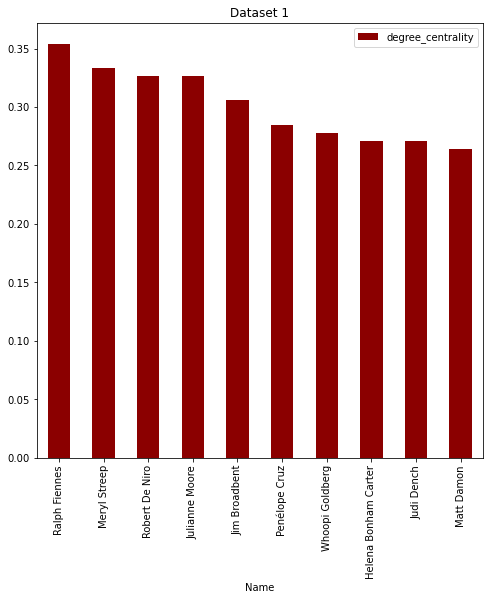

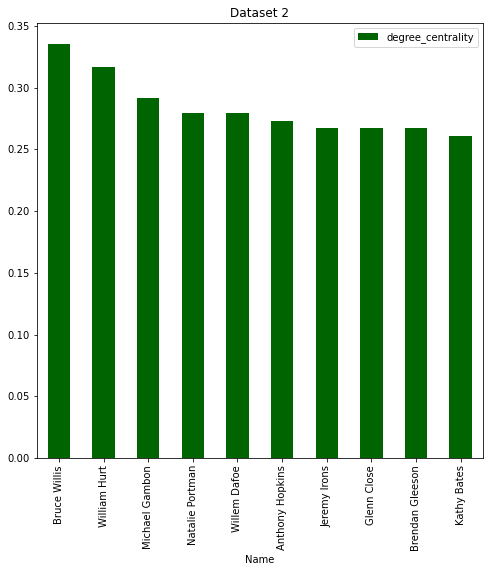

In [9]:
print(color.RED+color.BOLD+color.UNDERLINE+ 'Question 2(b)\n' + color.END) #Prints the question being answered.
rcParams['figure.figsize'] = 8,8 #Sets parameters for the graphs.

def print_graph_network1(y): #Function to print the graph for any desired attribute in our first dataframe.
    df.nlargest(10, y).plot.bar(y=y, color='darkred',title='Dataset 1') #Plots a bar chart of 10 largest chosen attributes.

print(color.BOLD + '\nHighest degree centrality in network 1: ' + color.END)
print(df.loc[df['degree_centrality'].idxmax()]) #Prints name with the highest degree centrality.
print_graph_network1('degree_centrality') #Prints a graph of the top 10 highest degree centralities.

print(color.BOLD + '\nHighest betweenness in network 1: ' + color.END)
print(df.loc[df['betweenness'].idxmax()]) #Prints name with the highest betweenness.
#print_graph_network1('betweenness') #Prints a graph of the top 10 highest betweennesses.

print(color.BOLD + '\nHighest closeness in network 1: ' + color.END)
print(df.loc[df['closeness'].idxmax()]) #Prints name with the highest closeness.
#print_graph_network1('closeness') #Prints graph of the top 10 highest closesnesses.

print(color.BOLD + '\nHighest eigenvector value in network 1: ' + color.END)
print(df.loc[df['eigenvector'].idxmax()]) #Prints name with the highest eigenvector.
#print_graph_network1('eigenvector') #Prints graph of top 10 highest eigenvectors.

print(color.BOLD + '\nHighest normalised eigenvector value in network 1: ' + color.END)
print(df.loc[df['norm_eigenvector'].idxmax()]) #Prints name with highest normalised eigenvector.
#print_graph_network1('norm_eigenvector') #Prints a graph of the top 10 highest normalised eigenvectors.

print('\n\n----------------------------------------------------------------------\n\n')

def print_graph_network2(y): #Function to print the graph for any desired attribute in our second dataframe.
    df2.nlargest(10, y).plot.bar(y=y,color='darkgreen', title='Dataset 2') #Plots a bar chart of 10 largest chosen attributes.

print(color.BOLD + 'Highest degree centrality in network 2: ' + color.END)
print(df2.loc[df2['degree_centrality'].idxmax()]) #Prints name with the highest degree centrality.
print_graph_network2('degree_centrality') #Prints a graph of the top 10 highest degree centralities.

print(color.BOLD + '\nHighest betweenness in network 2: ' + color.END)
print(df2.loc[df2['betweenness'].idxmax()]) #Prints name with the highest betweenness.
#print_graph_network2('betweenness') #Prints a graph of the top 10 highest betweennesses.

print(color.BOLD + '\nHighest closeness in network 2: ' + color.END)
print(df2.loc[df2['closeness'].idxmax()]) #Prints name with the highest closeness.
#print_graph_network2('closeness') #Prints graph of the top 10 highest closesnesses.

print(color.BOLD + '\nHighest eigenvector value in network 2: ' + color.END)
print(df2.loc[df2['eigenvector'].idxmax()]) #Prints name with the highest eigenvector.
#print_graph_network2('eigenvector') #Prints graph of top 10 highest eigenvectors.

print(color.BOLD + '\nHighest normalised eigenvector value in network 2: ' + color.END)
print(df2.loc[df2['norm_eigenvector'].idxmax()]) #Prints name with highest normalised eigenvector.
#print_graph_network2('norm_eigenvector') #Prints a graph of the top 10 highest normalised eigenvectors.

**Code Description**\
In the above cell, I identify which node in the network has the highest degree centrality, betweenness, closeness, eigenvector and normalised eigenvector values. I then print the specified node's values along with the name associated with that node. Finally, I wrote a function that would print a graph of any of the centrality measures mentioned above when that centrality measure is inputted into the function. For instance, if one inputted `degree_centrality` into the function, a graph of 10 names with the top degree centralities would be plotted. I commented most of these function calls out because it would produce too many graphs, but they can be uncommented for viewing if necessary.\
\
**Analysis**\
In network 1, Ralph Fiennes has the highest degree centrality, closeness, eigenvector and normalised eigenvector values, where as Robert De Niro has the highest betweenness value.\
In network 2, Bruce Willis has the highest degree centrality, betweenness and closeness values, where as William Hurt has the highest eigenvector and normalised eigenvector values.

Question 3

Ego network for Ralph Fiennes from dataset 1: 

Is this network directed: False
Is this network connected: True
This network has 52 nodes and 429 edges
The density of this network is: 0.324
The diameter of this network is: 2


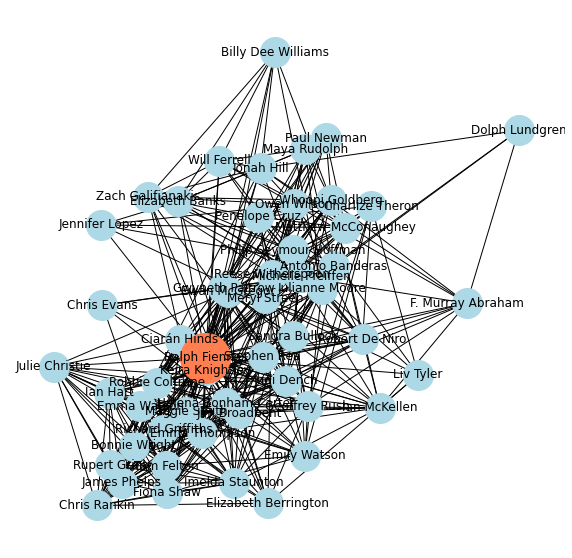

In [10]:
print(color.RED+color.BOLD+color.UNDERLINE+ 'Question 3\n' + color.END) #Prints the question being answered.

print(color.BOLD + 'Ego network for Ralph Fiennes from dataset 1: \n' + color.END)
ego_node = "Ralph Fiennes" #Variable containing our desired ego-node.
alters = g.neighbors(ego_node) #Variable containing the neighbours of our ego-node.
#for node in alters:
    #print(node)
    
eg = nx.ego_graph(g, ego_node) #Creates a networkx ego-graph for our ego-node.

print("Is this network directed: %s" % (nx.is_directed(eg))) #Checks if this network is directed.
print("Is this network connected: %s" % (nx.is_connected(eg))) #Checks if this network is connected.
print("This network has %d nodes and %d edges" % (eg.number_of_nodes(), eg.number_of_edges())) #Checks how many nodes and edges are in the network.
print("The density of this network is: %.3f" % (nx.density(eg))) #Checks the density of the network.
print("The diameter of this network is: %d" % (nx.diameter(eg))) #Checks the diameter of the network.

plt.figure(figsize=(10,10)) #Sets figure size.
plt.margins(0.1, 0.1) #Sets margins.
pos = nx.spring_layout(g)
nx.draw_networkx(eg, pos, with_labels=True, font_size=12, node_size=900, node_color="lightblue") #Adds our ego-node to the graph.
nx.draw_networkx_nodes(eg, pos, nodelist=[ego_node], node_size=2500, node_color="coral") #Adds our ego-nodes neighbours to the graph.
plt.axis("off")
plt.show() #Shows the plot.

**Code Description**\
I began by creating the ego-node `Ralph Fiennes`. I then placed all of the neighbours of this node into a list called alters and created the ego-graph based off of this. I then used queries to check whether the network is directed, whether it is connected, what its density is and what its diameter is. I also used a query to check how many nodes and edges were in the graph. I then plotted the ego-graph with the ego-node highlighted as orange in the middle and larger than the rest of the nodes.\
\
**Analysis**\
This is an undirected and fully connected graph that has a density of 0.324 and a diameter of 2. There are 52 nodes and 429 edges in this graph.

Question 3

Ego network for William Hurt from dataset 2: 

Is this network directed: False
Is this network connected: True
This network has 52 nodes and 378 edges
The density of this network is: 0.285
The diameter of this network is: 2


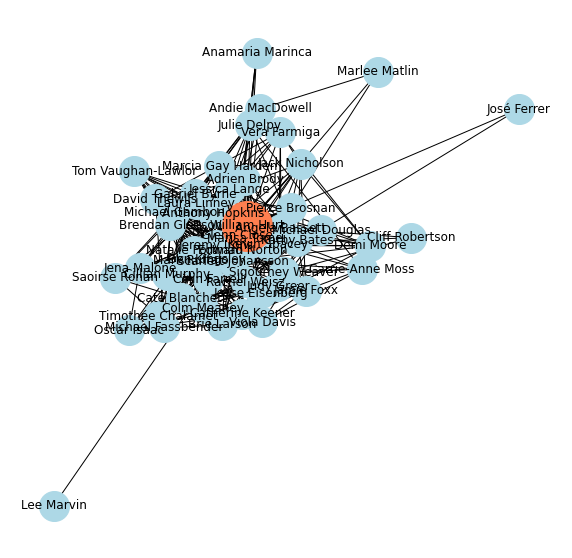

In [11]:
print(color.RED+color.BOLD+color.UNDERLINE+ 'Question 3\n' + color.END) #Prints the question being answered.

print(color.BOLD + 'Ego network for William Hurt from dataset 2: \n' + color.END)
ego_node2 = "William Hurt" #Variable containing our desired ego-node.
alters = g2.neighbors(ego_node2) #Variable containing the neighbours of our ego-node.
#for node in alters:
    #print(node)
    
eg2 = nx.ego_graph(g2, ego_node2) #Creates a networkx ego-graph for our ego-node.

print("Is this network directed: %s" % (nx.is_directed(eg2))) #Checks if this network is directed.
print("Is this network connected: %s" % (nx.is_connected(eg2))) #Checks if this network is connected.
print("This network has %d nodes and %d edges" % (eg2.number_of_nodes(), eg2.number_of_edges())) #Checks how many nodes and edges are in the network.
print("The density of this network is: %.3f" % (nx.density(eg2))) #Checks the density of the network.
print("The diameter of this network is: %d" % (nx.diameter(eg2))) #Checks the diameter of the network.

plt.figure(figsize=(10,10)) #Sets figure size.
plt.margins(0.1, 0.1) #Sets margins.
pos2 = nx.spring_layout(g2)
nx.draw_networkx(eg2, pos2, with_labels=True, font_size=12, node_size=900, node_color="lightblue") #Adds our ego-node to the graph.
nx.draw_networkx_nodes(eg2, pos2, nodelist=[ego_node2], node_size=2500, node_color="coral") #Adds our ego-nodes neighbours to the graph.
plt.axis("off")
plt.show() #Shows the plot.

\
**(Same steps as previous cell)**\
\
**Code Description**\
I began by creating the ego-node `William Hurt`. I then placed all of the neighbours of this node into a list called alters and created the ego-graph based off of this. I then used queries to check whether the network is directed, whether it is connected, what its density is and what its diameter is. I also used a query to check how many nodes and edges were in the graph. I then plotted the ego-graph with the ego-node highlighted as orange in the middle and larger than the rest of the nodes.\
\
**Analysis**\
This is an undirected and fully connected graph that has a density of 0.285 and a diameter of 2. There are 52 nodes and 378 edges in this graph.

**Comparison between networks:**\
Both ego-networks are very simliar to one another, and have very similiar attributes. Ego-network 1 has 52 nodes and 429 edges and Ego-network 2 has 52 nodes and 378 edges, which comparably is extremely simliar. Ego-network 1 has a density of 0.324 and ego-network 2 has a sightly lower density of 0.285. Both ego-networks are undirected, connected and have a diameter of 2.
Overall, both of these ego-networks are extremely similiar to eachother, with only a few minor differences setting them apart.